# Assignment 01 - Digit Recognizer

Identifying written digits using the [MNIST dataset](https://www.kaggle.com/competitions/digit-recognizer/overview)

Thiago Amado Costa

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
import tensorflow as tf
from keras.applications import VGG16
from pipeline import baseline_model, svm_classifier, create_cnn

## Reading Dataset
- Label = written digit
- pixelx = pixels of the image
- image is 28x28 (pixel0 .. pixel27 as first row, and so on)

In [4]:
df = pd.read_csv('data/train.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
y = df['label']
X = df.drop('label', axis=1)

- plotting number 04 as example

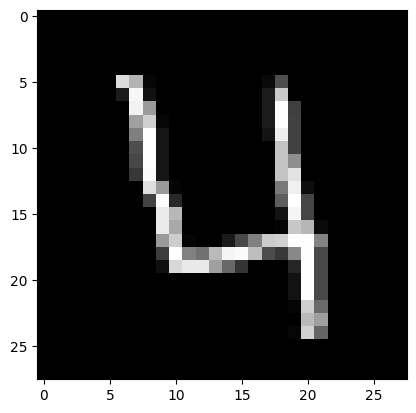

In [6]:
num_4 = X.values.reshape(-1,28,28,1)[3]
plt.imshow(num_4, cmap='grey')

- Train and test splitting 

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

## Baseline Model

- Dummy model as a base for comparing with other ml models and cnn

In [8]:
print(f'Dummy accuracy: {baseline_model(X_train, y_train, X_test, y_test)}')

Dummy accuracy: 0.10821428571428572


## Training - SVM

### Linear Kernel

In [10]:
s = svm_classifier(X_train, y_train, X_test, y_test, kernel="linear")
print(f'SVM linear accuracy: {s}')

SVM linear accuracy: 0.9170238095238096


### Polynomial Kernel

In [11]:
s = svm_classifier(X_train, y_train, X_test, y_test, kernel="poly")
print(f'SVM poly accuracy: {s}')

SVM poly accuracy: 0.9653571428571428


In [12]:
s = svm_classifier(X_train, y_train, X_test, y_test, kernel="poly", num_samples=X_train.shape[0])
print(f'SVM poly accuracy (all samples): {s}')

SVM poly accuracy (all samples): 0.9809523809523809


## Training - CNN

- reshaping the inputs into 28x28 nparrays
- normalizing values between 0 and 1
- transforming values to shape (64,64,3), to use with VGG16

In [16]:
X_train = X_train.values.reshape(-1,28,28)
X_train = X_train / 255.0 
X_test = X_test.values.reshape(-1,28,28)
X_test = X_test / 255.0 

X_train=tf.image.grayscale_to_rgb(tf.expand_dims(X_train, axis=3)) 
X_test=tf.image.grayscale_to_rgb(tf.expand_dims(X_test, axis=3))
X_train=tf.image.resize_with_pad(X_train,64,64)
X_test=tf.image.resize_with_pad(X_test,64,64)

Epoch 1/10


263/263 [==============================] - 521s 2s/step - loss: 0.1184 - accuracy: 0.9639 - val_loss: 0.0258 - val_accuracy: 0.9927
Epoch 2/10
263/263 [==============================] - 515s 2s/step - loss: 0.0309 - accuracy: 0.9907 - val_loss: 0.0276 - val_accuracy: 0.9910
Epoch 3/10
263/263 [==============================] - 522s 2s/step - loss: 0.0214 - accuracy: 0.9934 - val_loss: 0.0253 - val_accuracy: 0.9919
Epoch 4/10
263/263 [==============================] - 506s 2s/step - loss: 0.0158 - accuracy: 0.9951 - val_loss: 0.0250 - val_accuracy: 0.9927
Epoch 5/10
263/263 [==============================] - 497s 2s/step - loss: 0.0138 - accuracy: 0.9955 - val_loss: 0.0292 - val_accuracy: 0.9910
Epoch 6/10
263/263 [==============================] - 503s 2s/step - loss: 0.0115 - accuracy: 0.9969 - val_loss: 0.0205 - val_accuracy: 0.9939
Epoch 7/10
263/263 [==============================] - 519s 2s/step - loss: 0.0104 - accuracy: 0.9968 - val_loss: 0.0385 - val_accuracy: 0.99

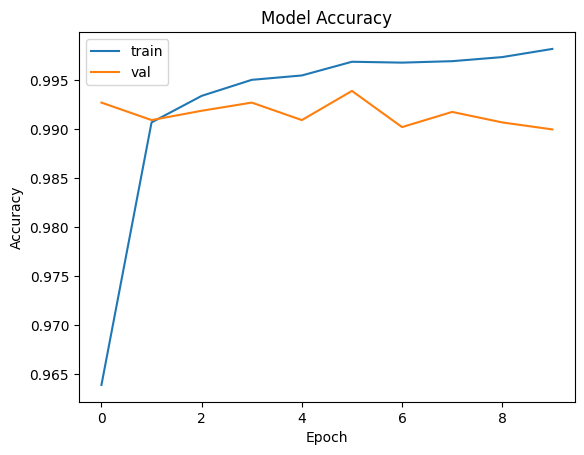

In [17]:
cnn = create_cnn(10)
history = cnn.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Results Analysis

The problem of classifying handwritten digits with the MNIST dataset is considered a beginner problem in Machine Learning, serving as a base for benchmarking different models. In this notebook, a Dummmy classifier was created, to show the success rate one would have by just 'guessing', which was approximately 11 % of accuracy.
A better ML approach to the problem is by using SVM. By using svm with the Linear kernel, the model gets a good result, but the result is improved by changing the kernel to Polynomial, when training with a sample of 10000 of the train data. Then, to improve the model accuracy, training with all the samples, and using Normalization, SVM with polynomial kernel gets a accuracy of 98 %.
Another ML approach is to create a CNN. In this case, transfer learning is beeing used, with the VGG16 model, and by training for 7 epochs, with batch size of 128, the max accuracy in the validation data was of 99,4 %.

Key points :
 - A simpler ML approach, like linear SVM, is enough to get a good accuracy in this dataset, even when training with a sample of the ds.
 - To improve it, change the kernel to Linear and add a Normalization to the pipeline.
 - a CNN approach will get better results, at the cost of more training time 